In [3]:
import numpy as np 
import math
import matplotlib.pyplot as plt 
import pandas as pd
import os
os.chdir('../')

In [4]:
def get_bdlp(exp, t, s, b, m, num_seeds=10):
    base = f"figs/{exp}/num_seeds_{num_seeds}/{t}_stepsize_{s}_{b}"
    mean = np.load(f"{base}_{m}_mean.npy")
    var = np.load(f"{base}_{m}_var.npy")
    return mean, var

In [5]:
a, d = get_bdlp("rbm_sample", "dmala", 0.5, 0.7, "log_mmds", num_seeds=10)

In [6]:
bal_big = [.9, .92, .95, .97, .99, 1.0]
step_big = [2.0, 3.0, 4.0, 4.5, 5.0, 5.5, 6.0, 7.0, 8.0, 10.0, 20.0]
bal_small = [.5, .6, .7, .8, .9]
step_small = [.1, .2, .5, 1.0]

In [7]:
total_data_res = []
for bal, step in [(bal_small, step_small), (bal_big, step_big)]:
    for b in bal: 
        for s in step:
            comb_results = {}
            comb_results["stepsize"] = s
            comb_results["bal"] = b
            for metric in ["a_s", "hops", "log_mmds"]:
                mean, var = get_bdlp("rbm_sample", "dmala", s, b, metric, num_seeds=10)
                comb_results[f"{metric}_mean_100"] = mean[: int(len(mean) * .05)].mean()
                comb_results[f"{metric}_mean_last"] = mean[int(len(mean) * .75):].mean()
                comb_results[f"{metric}_mean_total"] = mean.mean()
                comb_results[f"{metric}_var_100"] = var[: int(len(mean) * .05)].mean()
                comb_results[f"{metric}_var_last"] = var[int(len(mean) * .75):].mean()
                comb_results[f"{metric}_var_total"] = var.mean()
            total_data_res.append(comb_results)
            
dmala_rbm_df = pd.DataFrame(total_data_res)

In [9]:
dmala_rbm_df[dmala_rbm_df['stepsize']==.1]

,stepsize,bal,a_s_mean_100,a_s_mean_last,a_s_mean_total,a_s_var_100,a_s_var_last,a_s_var_total,hops_mean_100,hops_mean_last,hops_mean_total,hops_var_100,hops_var_last,hops_var_total,log_mmds_mean_100,log_mmds_mean_last,log_mmds_mean_total,log_mmds_var_100,log_mmds_var_last,log_mmds_var_total
0,0.1,0.5,0.983848,0.982046,0.982207,0.000146,0.000160,0.000157,1.73440,1.342808,1.395252,0.012169,0.022976,0.018154,-3.621770,-4.585045,-4.182799,0.232209,0.635407,0.465285
4,0.1,0.6,0.735248,0.827771,0.822278,0.001683,0.001313,0.001323,1.23496,1.062704,1.099490,0.017195,0.017559,0.015776,-3.686961,-4.420066,-4.061778,0.244069,0.612771,0.423529
8,0.1,0.7,0.264788,0.645698,0.599346,0.001590,0.002057,0.002051,0.45276,0.777096,0.757980,0.009455,0.012136,0.011522,-3.847877,-4.108692,-3.860575,0.310038,0.357715,0.274753
12,0.1,0.8,0.054368,0.348798,0.272461,0.000459,0.001892,0.001520,0.08764,0.405296,0.333690,0.002252,0.007383,0.005939,-3.898309,-3.945340,-3.836976,0.347118,0.303220,0.274872
16,0.1,0.9,0.013900,0.113858,0.077670,0.000133,0.000860,0.000654,0.02320,0.132784,0.095848,0.000556,0.002959,0.002151,-3.907727,-3.883792,-3.873680,0.355467,0.260009,0.285664


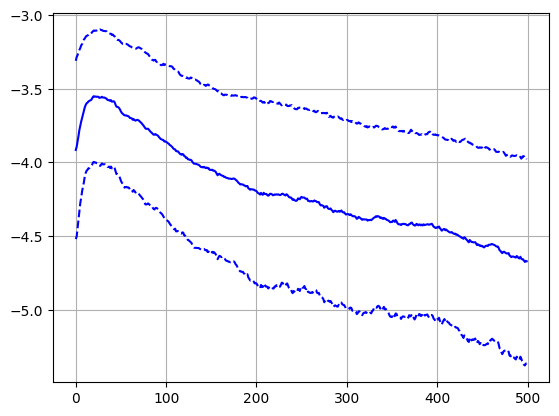

In [16]:
mean, var = get_bdlp("rbm_sample", "dula", .1, .5, 'log_mmds', num_seeds=10)
plt.plot(mean, 'b-')
plt.plot(mean + var ** .5, 'b--')
plt.plot(mean - var ** .5, 'b--')

plt.grid()

In [ ]:
# what graph I need to generate here: 
# for 

In [8]:
a_s_df = dmala_rbm_df.loc[dmala_rbm_df.groupby("bal")["a_s_mean_100"].idxmax()]
col_of_interest = ['stepsize', 'bal', 'a_s_mean_100', 
                   'a_s_var_100', 'hops_mean_100', 'hops_var_100',
                   'a_s_mean_total', 'a_s_var_total',
                   'hops_mean_last', 'hops_var_last',
                  'log_mmds_mean_last', 'log_mmds_var_last']
a_s_res = a_s_df[['stepsize', 'bal', 'a_s_mean_100', 'hops_mean_last', 'hops_var_last']]
display(a_s_res)

,stepsize,bal,a_s_mean_100,hops_mean_last,hops_var_last
0,0.1,0.50,0.984824,1.342808,0.022976
5,0.2,0.60,0.685016,10.490528,3.319969
10,0.5,0.70,0.540680,24.046911,33.083138
15,1.0,0.80,0.529824,31.319247,49.872574
21,3.0,0.90,0.513928,37.299743,70.485799
34,4.5,0.92,0.494768,38.701815,73.800573
51,10.0,0.95,0.445624,39.733679,80.045140
63,20.0,0.97,0.341696,40.698663,90.162213
74,20.0,0.99,0.170512,39.644159,96.534013
85,20.0,1.00,0.102480,38.387831,94.249524


In [9]:
mmds_df = dmala_rbm_df.loc[dmala_rbm_df.groupby("bal")["log_mmds_mean_last"].idxmin()]
mmds_df = mmds_df[['stepsize', 'bal', 'a_s_mean_250', 'log_mmds_mean_last', 'log_mmds_var_last']]
display(mmds_df)

KeyError: "['a_s_mean_250'] not in index"

In [10]:
step_20, _ = get_bdlp("rbm_sample", "dmala", .5, .5, "log_mmds", num_seeds=10)
step_10, _ = get_bdlp("rbm_sample", "dmala", 10.0, 0.95, "a_s", num_seeds=10)

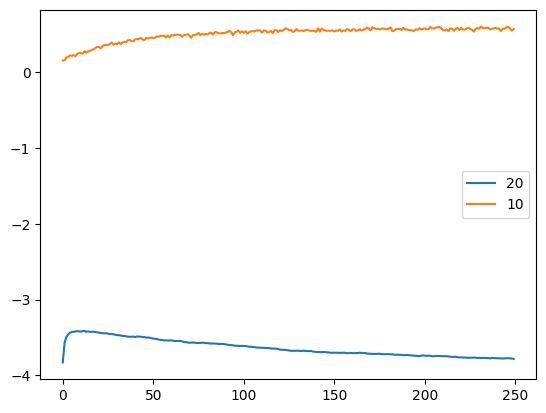

In [11]:
plt.plot(step_20[:250], label='20')
plt.plot(step_10[:250], label='10')
plt.legend()

In [12]:
a, b = get_bdlp("rbm_sample", "dmala", 20.0, .9, "log_mmds", num_seeds=10)

In [13]:
step_20, _ = get_bdlp("rbm_sample", "dmala", 20.0, 0.95, "hops", num_seeds=10)
step_10, _ = get_bdlp("rbm_sample", "dmala", 10.0, 0.95, "hops", num_seeds=10)

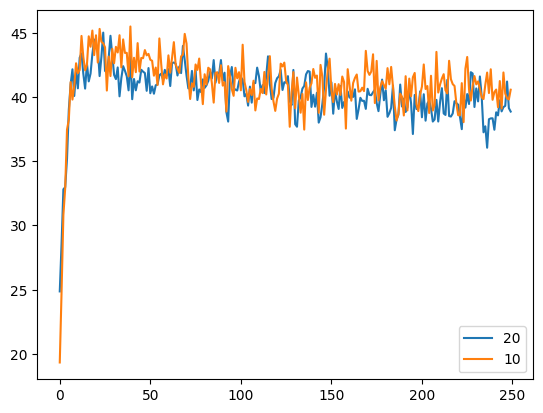

In [14]:
plt.plot(step_20[:250], label='20')
plt.plot(step_10[:250], label='10')
plt.legend()

In [15]:
# comparison rbm sample for cyc dmala 
burnin_filepath = "figs/rbm_sample/num_seeds_10/cyc_dmala_burnin_adaptive_0.025_alg_big_is_better_cycles_250"
burnin_mean = np.load(f"{burnin_filepath}_log_mmds_mean.npy")
burnin_std = np.load(f"{burnin_filepath}_log_mmds_var.npy") ** .5
dmala_mean, dmala_var = get_bdlp("rbm_sample", "dmala", 0.2, 0.5, "log_mmds", num_seeds=10)
dmala_std = dmala_var ** .5
x = [i * 10 for i in range(500)]

In [16]:
def get_cyc_dlp(temp, exp, num_seeds, metric, 
                step=2.0, bal=1.0, cycles=250):
    fp = f"figs/{exp}/num_seeds_{num_seeds}"
    m_name = f"{temp}_cycles_{cycles}_stepsize_{step}_usebal_True_initbal_{bal}_include_exploration_True"
    return np.load(f"{fp}/{m_name}_{metric}_mean.npy"), np.load(f"{fp}/{m_name}_{metric}_var.npy")
cyc_dmala_mean, cyc_dmala_var = get_cyc_dlp("cyc_dmala", "rbm_sample", 10, "log_mmds")
cyc_dmala_std = cyc_dmala_var ** .5

Text(0.5, 0, 'Iteration')

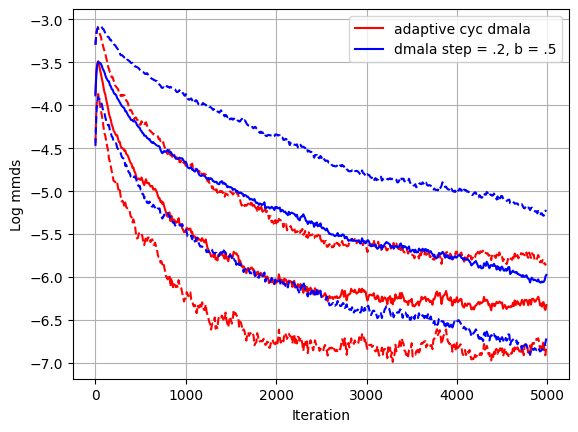

In [17]:
# plt.fill_between(x, burnin_mean - burnin_std, burnin_mean + burnin_std, label="burnin")
# plt.fill_between(x, dmala_mean - dmala_std, dmala_mean + dmala_std, label="best dmala")
plt.plot(x, burnin_mean - burnin_std, 'r--')
plt.plot(x, burnin_mean + burnin_std, 'r--')
plt.plot(x, burnin_mean, 'r-', label="adaptive cyc dmala")

plt.plot(x, dmala_mean - dmala_std, 'b--')
plt.plot(x, dmala_mean + dmala_std, 'b--')
plt.plot(x, dmala_mean, 'b-', label="dmala step = .2, b = .5")

# plt.plot(x, cyc_dmala_mean - cyc_dmala_std, 'g--')
# plt.plot(x, cyc_dmala_mean + cyc_dmala_std, 'g--')
# plt.plot(x, cyc_dmala_mean, 'g-', label="cyc dmala")

plt.grid()
plt.legend()
plt.ylabel("Log mmds")
plt.xlabel("Iteration")

In [18]:
# comparison rbm sample for cyc dmala 
burnin_filepath = "figs/rbm_sample/num_seeds_10/cyc_dula_burnin_adaptive_0.025_alg_big_is_better_cycles_250"
burnin_mean = np.load(f"{burnin_filepath}_log_mmds_mean.npy")
burnin_std = np.load(f"{burnin_filepath}_log_mmds_var.npy") ** .5
dula_mean, dula_var = get_bdlp("rbm_sample", "dula", 0.2, 0.5, "log_mmds", num_seeds=10)
dula_std = dmala_var ** .5
x = [i * 10 for i in range(500)]

In [19]:
cyc_dula_mean, cyc_dula_var = get_cyc_dlp("cyc_dula", "rbm_sample", 10, "log_mmds")
cyc_dula_std = cyc_dula_var ** .5

Text(0.5, 0, 'Iteration')

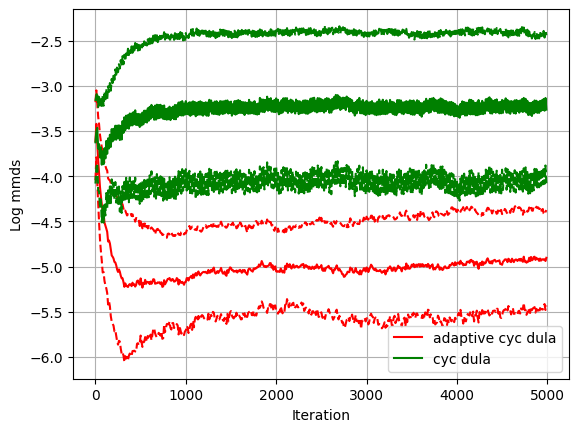

In [20]:
plt.plot(x, burnin_mean - burnin_std, 'r--')
plt.plot(x, burnin_mean + burnin_std, 'r--')
plt.plot(x, burnin_mean, 'r-', label="adaptive cyc dula")

# plt.plot(x, dula_mean - dula_std, 'b--')
# plt.plot(x, dula_mean + dula_std, 'b--')
# plt.plot(x, dula_mean, 'b-', label="dula step = .2, b = .5")

plt.plot(x, cyc_dula_mean - cyc_dula_std, 'g--')
plt.plot(x, cyc_dula_mean + cyc_dula_std, 'g--')
plt.plot(x, cyc_dula_mean, 'g-', label='cyc dula')

plt.grid()
plt.legend()
plt.ylabel("Log mmds")
plt.xlabel("Iteration")

Text(0, 0.5, 'Log MMDS')

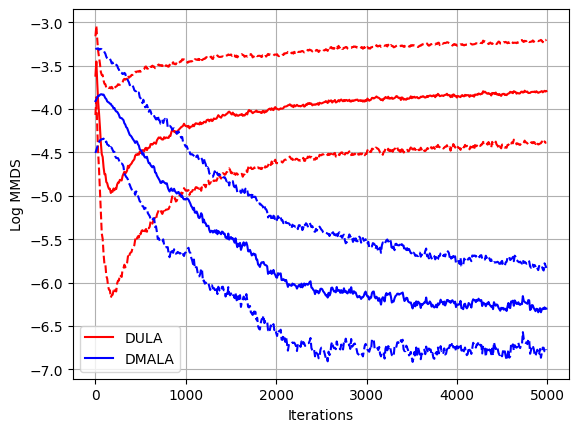

In [21]:
dula_big = "figs/rbm_sample/num_seeds_10/dula_use_big"
dula_big_mean = np.load(f"{dula_big}_log_mmds_mean.npy")
dula_big_std = np.load(f"{dula_big}_log_mmds_var.npy") ** .5

dmala_big = "figs/rbm_sample/num_seeds_10/dmala_use_big"
dmala_big_mean = np.load(f"{dmala_big}_log_mmds_mean.npy")
dmala_big_std = np.load(f"{dmala_big}_log_mmds_var.npy") ** .5

plt.plot(x, dula_big_mean - dula_big_std, 'r--')
plt.plot(x, dula_big_mean + dula_big_std, 'r--')
plt.plot(x, dula_big_mean, 'r-',  label = "DULA")

plt.plot(x, dmala_big_mean - dmala_big_std, 'b--')
plt.plot(x, dmala_big_mean + dmala_big_std, 'b--')
plt.plot(x, dmala_big_mean, 'b-', label = "DMALA",)
plt.grid()
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Log MMDS")

Text(0, 0.5, 'Iterations')

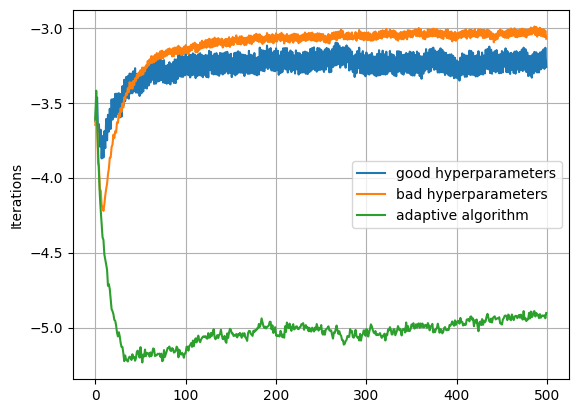

In [22]:
# comparison rbm sample for cyc dmala 
burnin_filepath = "figs/rbm_sample/num_seeds_10/cyc_dula_burnin_adaptive_0.025_alg_big_is_better_cycles_250"
burnin_mean = np.load(f"{burnin_filepath}_log_mmds_mean.npy")
burnin_std = np.load(f"{burnin_filepath}_log_mmds_var.npy") ** .5
cyc_dula_name = lambda step : f"cyc_dula_cycles_250_stepsize_{step}_usebal_True_initbal_1.0_include_exploration_True"
cyc_dula_good = f"figs/rbm_sample/num_seeds_10/{cyc_dula_name(2.0)}"
cyc_dula_good_mean = np.load(f"{cyc_dula_good}_log_mmds_mean.npy")
cyc_dula_good_std = np.load(f"{cyc_dula_good}_log_mmds_var.npy") ** .5

cyc_dula_bad = f"figs/rbm_sample/num_seeds_10/{cyc_dula_name(.5)}"
cyc_dula_bad_mean = np.load(f"{cyc_dula_bad}_log_mmds_mean.npy")
cyc_dula_bad_std = np.load(f"{cyc_dula_bad}_log_mmds_var.npy") ** .5

plt.plot(cyc_dula_good_mean, label='good hyperparameters')
plt.plot(cyc_dula_bad_mean, label='bad hyperparameters')
plt.plot(burnin_mean, label='adaptive algorithm')

plt.grid()
plt.legend()
plt.ylabel("Log MMDS")
plt.ylabel("Iterations")

Text(0.5, 0, 'Iteration')

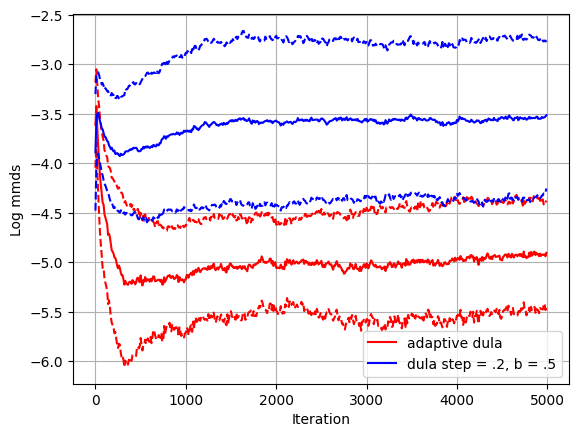

In [23]:
dula_mean, dula_var = get_bdlp("rbm_sample", "dula", 0.2, 0.5, "log_mmds", num_seeds=10)
dula_std = dmala_var ** .5
x = [i * 10 for i in range(500)]

plt.plot(x, burnin_mean - burnin_std, 'r--')
plt.plot(x, burnin_mean + burnin_std, 'r--')
plt.plot(x, burnin_mean, 'r-', label="adaptive dula")


plt.plot(x, dula_mean - dula_std, 'b--')
plt.plot(x, dula_mean + dula_std, 'b--')
plt.plot(x, dula_mean, 'b-', label="dula step = .2, b = .5")
plt.grid()
plt.legend()
plt.ylabel("Log mmds")
plt.xlabel("Iteration")

In [24]:
metric = "hops"
dmala = np.load(f"figs/ising_sample/num_seeds_10/dmala_stepsize_0.4_0.5_{metric}_mean.npy", allow_pickle=True)
dmala_var = np.load(f"figs/ising_sample/num_seeds_10/dmala_stepsize_0.4_0.5_{metric}_var.npy", allow_pickle=True)
dmala_std = dmala_var ** .5 

dmala_adapt = np.load(f"figs/ising_sample/num_seeds_10/cyc_dmala_burnin_adaptive_0.025_alg_big_is_better_cycles_5000_{metric}_mean.npy", allow_pickle=True)
dmala_adapt_var = np.load(f"figs/ising_sample/num_seeds_10/cyc_dmala_burnin_adaptive_0.025_alg_big_is_better_cycles_5000_{metric}_var.npy", allow_pickle=True)
dmala_adapt_std = dmala_adapt_var ** .5 


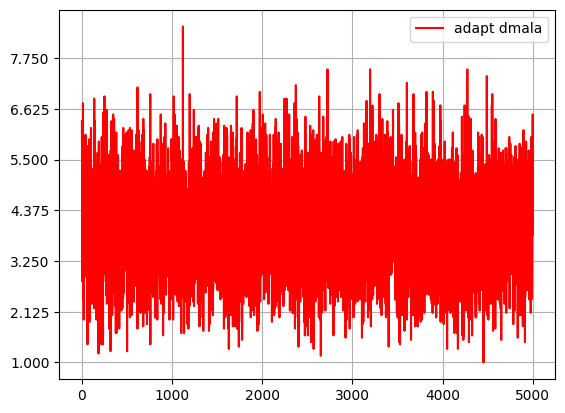

In [25]:
# plt.plot(dmala, 'b-', label="normal dmala")
plt.yticks(np.linspace(1, 10, 9))
# plt.plot(dmala + dmala_std, 'b--')
# plt.plot(dmala - dmala_std, 'b--')

plt.plot(dmala_adapt, 'r-', label="adapt dmala")
# plt.plot(dmala_adapt + dmala_adapt_std, 'r--')
# plt.plot(dmala_adapt - dmala_adapt_std, 'r--')

plt.legend()
plt.grid()

In [26]:
dula = np.load("figs/ising_sample/num_seeds_10/dula_stepsize_0.2_0.5_log_rmse_mean.npy", allow_pickle=True)
dula_var = np.load("figs/ising_sample/num_seeds_10/dula_stepsize_0.2_0.5_log_rmse_var.npy", allow_pickle=True)
dula_std = dmala_var ** .5 

dula_adapt = np.load("figs/ising_sample/num_seeds_10/cyc_dula_burnin_adaptive_0.025_alg_big_is_better_cycles_5000_log_rmse_mean.npy", allow_pickle=True)
dula_adapt_var = np.load("figs/ising_sample/num_seeds_10/cyc_dula_burnin_adaptive_0.025_alg_big_is_better_cycles_5000_log_rmse_var.npy", allow_pickle=True)
dula_adapt_std = dula_adapt_var ** .5 

ValueError: operands could not be broadcast together with shapes (50,) (5000,) 

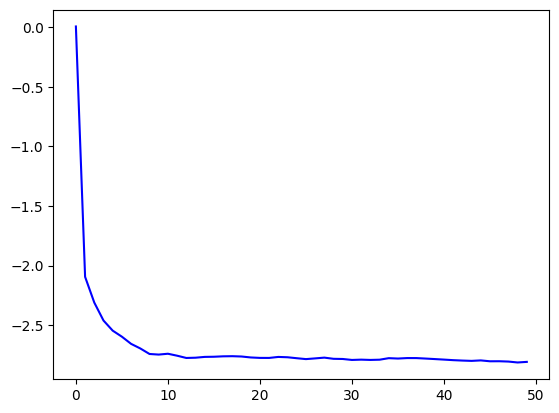

In [27]:
plt.plot(dula, 'b-', label="normal dula")
plt.plot(dula + dula_std, 'b--')
plt.plot(dula - dula_std, 'b--')

plt.plot(dula_adapt, 'r-', label="adapt dula")
plt.plot(dula_adapt + dula_adapt_std, 'r--')
plt.plot(dula_adapt - dula_adapt_std, 'r--')

plt.legend()
plt.grid()

In [32]:
metric = "log_mmds"
dmala = np.load(f"figs/rbm_sample/num_seeds_10/dmala_stepsize_0.2_0.5_{metric}_mean.npy", allow_pickle=True)
dmala_var = np.load(f"figs/rbm_sample/num_seeds_10/dmala_stepsize_0.2_0.5_{metric}_var.npy", allow_pickle=True)
dmala_std = dmala_var ** .5 

dmala_adapt = np.load(f"figs/rbm_sample/num_seeds_10/cyc_dmala_burnin_adaptive_0.025_alg_big_is_better_cycles_250_{metric}_mean.npy", allow_pickle=True)
dmala_adapt_var = np.load(f"figs/rbm_sample/num_seeds_10/cyc_dmala_burnin_adaptive_0.025_alg_big_is_better_cycles_250_{metric}_var.npy", allow_pickle=True)
dmala_adapt_std = dmala_adapt_var ** .5 
dmala_adapt = np.load(f"figs/rbm_sample/num_seeds_10/cyc_dmala_burnin_adaptive_0.025_alg_big_is_better_cycles_250_{metric}_mean.npy", allow_pickle=True)
dmala_cyc = np.load('figs/rbm_sample/num_seeds_10/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_log_mmds_mean.npy')

In [33]:
dmala_steps_ = np.load(f"figs/rbm_sample/num_seeds_10/cyc_dmala_burnin_adaptive_0.025_alg_big_is_better_cycles_250_{metric}_var.npy", allow_pickle=True)


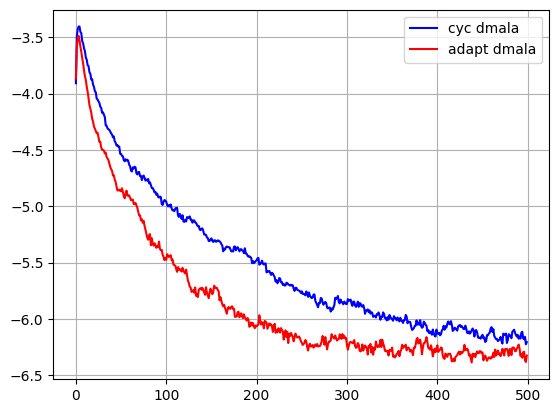

In [34]:
plt.plot(dmala_cyc, 'b-', label="cyc dmala")
# plt.plot(dmala + dmala_std, 'b--')
# plt.plot(dmala - dmala_std, 'b--')

plt.plot(dmala_adapt, 'r-', label="adapt dmala")
# plt.plot(dmala_adapt + dmala_adapt_std, 'r--')
# plt.plot(dmala_adapt - dmala_adapt_std, 'r--')

plt.legend()
plt.grid()

In [34]:
# looking at the step sizes the adaptive algorithm picks 
import pickle 
file_dir = f"figs/rbm_sample/num_seeds_10"
bal = pickle.load(open(f"{file_dir}/cyc_dmala_burnin_adaptive_0.025_alg_big_is_better_cycles_250_burnin_bal.pickle", "rb"))
steps = pickle.load(open(f"{file_dir}/cyc_dmala_burnin_adaptive_0.025_alg_big_is_better_cycles_250_burnin_steps.pickle", "rb"))

In [35]:
bal = np.array(bal)

bal_mean = bal.mean(axis=0)
bal_std = bal.std(axis=0)

([<matplotlib.axis.XTick at 0x7f5bb92ecaf0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

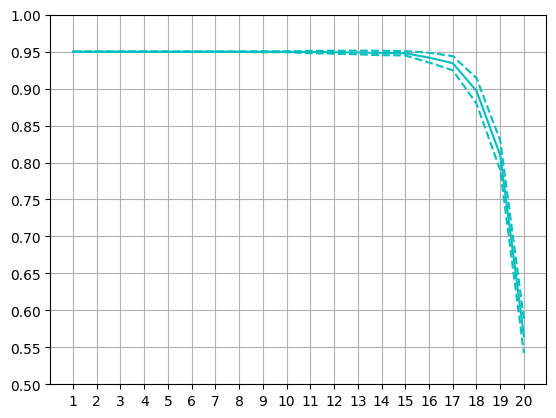

In [55]:
x = [i+1 for i in range(20)]
plt.plot(x, bal_mean + bal_std, 'c--')
plt.plot(x, bal_mean - bal_std, 'c--')
plt.plot(x, bal_mean, 'c-')
plt.grid()
plt.yticks([.5, .55, .6, .65, .7, .75, .8, .85, .9, .95, 1.0])
plt.xticks(x)

In [37]:
a, d = get_bdlp("rbm_sample", "dula", 10.0, 1.0, "log_mmds", num_seeds=10)

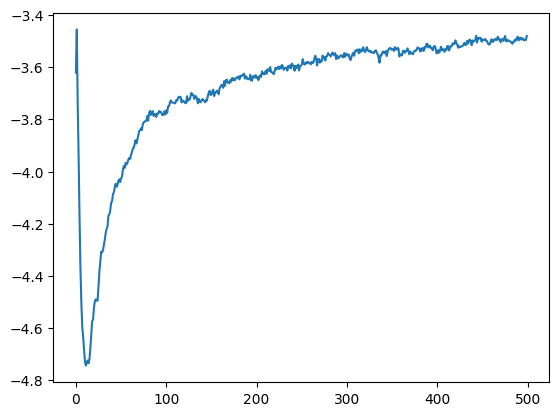

In [38]:
plt.plot(a)

In [39]:
import itertools
import time 
cur = time.time()
ctr = 0
for i in itertools.product([-1.0, 1.0], repeat=25):
    ctr += 1 
end = time.time()

In [40]:
ctr

33554432

In [93]:
temp = "dula"
num_seeds = 10

no_hops_norm_bal = f"figs/rbm_sample_adapt_nohops_normbal/num_seeds_{num_seeds}/cyc_{temp}_burnin_adaptive_0.025_alg_big_is_better_cycles_250"
no_hops_norm_bal_mean = np.load(f"{no_hops_norm_bal}_log_mmds_mean.npy")
no_hops_norm_bal_std = np.load(f"{no_hops_norm_bal}_log_mmds_var.npy") ** .5


hops_revbal = f"figs/rbm_sample_adapt_hops_revbal/num_seeds_{num_seeds}/cyc_{temp}_burnin_adaptive_0.025_alg_big_is_better_cycles_250"
hops_revbal_mean = np.load(f"{hops_revbal}_log_mmds_mean.npy")
hops_revbal_std = np.load(f"{hops_revbal}_log_mmds_var.npy") ** .5

no_hops_revbal = f"figs/rbm_sample_adapt_nohops_revbal/num_seeds_{num_seeds}/cyc_{temp}_burnin_adaptive_0.025_alg_big_is_better_cycles_250"
no_hops_revbal_mean = np.load(f"{no_hops_revbal}_log_mmds_mean.npy")
no_hops_revbal_std = np.load(f"{no_hops_revbal}_log_mmds_var.npy") ** .5

hops_normbal = f"figs/rbm_sample_adapt_hops_normbal/num_seeds_{num_seeds}/cyc_{temp}_burnin_adaptive_0.025_alg_big_is_better_cycles_250"
hops_normbal_mean = np.load(f"{hops_normbal}_log_mmds_mean.npy")
hops_normbal_std = np.load(f"{hops_normbal}_log_mmds_var.npy") ** .5



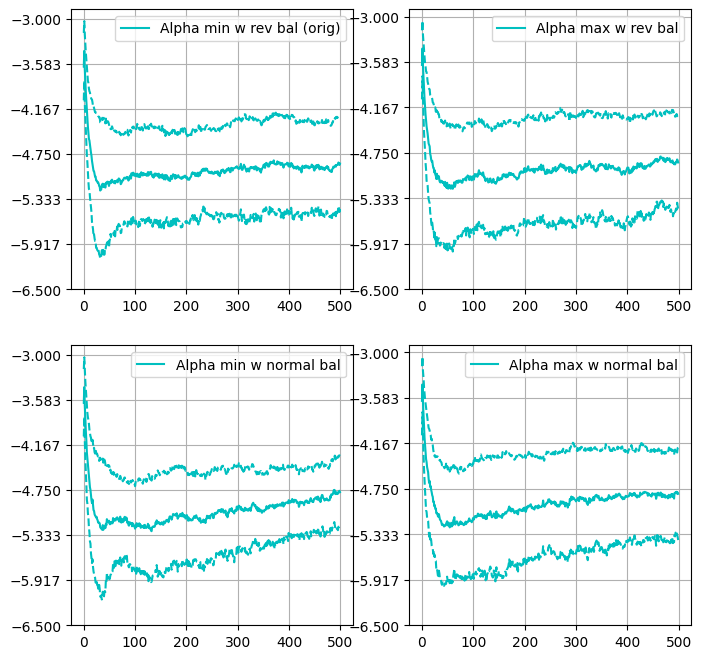

In [94]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

ax[0, 0].plot(hops_revbal_mean - hops_revbal_std, 'c--')
ax[0, 0].plot(hops_revbal_mean + hops_revbal_std, 'c--')
ax[0, 0].plot(hops_revbal_mean, 'c-', label="Alpha min w rev bal (orig)")
ax[0, 0].legend()
ax[0, 0].set_yticks(np.linspace(-3, -6.5, 7))
ax[0, 0].grid()

ax[0, 1].plot(no_hops_revbal_mean - no_hops_revbal_std, 'c--')
ax[0, 1].plot(no_hops_revbal_mean + no_hops_revbal_std, 'c--')
ax[0, 1].plot(no_hops_revbal_mean, 'c-', label="Alpha max w rev bal")
ax[0, 1].legend()
ax[0, 1].set_yticks(np.linspace(-3, -6.5, 7))
ax[0, 1].grid()


ax[1, 0].plot(hops_normbal_mean - hops_normbal_std, 'c--')
ax[1, 0].plot(hops_normbal_mean + hops_normbal_std, 'c--')
ax[1, 0].plot(hops_normbal_mean, 'c-', label="Alpha min w normal bal")
ax[1, 0].legend()
ax[1, 0].set_yticks(np.linspace(-3, -6.5, 7))

ax[1, 0].grid()




ax[1, 1].plot(no_hops_norm_bal_mean - no_hops_norm_bal_std, 'c--')
ax[1, 1].plot(no_hops_norm_bal_mean + no_hops_norm_bal_std, 'c--')
ax[1, 1].plot(no_hops_norm_bal_mean, 'c-', label="Alpha max w normal bal")
ax[1, 1].legend()
ax[1, 1].grid()
ax[1, 1].set_yticks(np.linspace(-3, -6.5, 7))

In [92]:
np.load("figs/rbm_sample/num_seeds_10/cyc_dula_cycles_250_stepsize_2.0_usebal_True_initbal_1.0_include_exploration_True_log_mmds_mean.npy")

array([-3.62384007, -3.50292912, -3.46440895, -3.69468653, -3.64352696,
       -3.79222674, -3.68033895, -3.87163718, -3.72241762, -3.8658983 ,
       -3.68962419, -3.80300941, -3.60863411, -3.75078378, -3.58060927,
       -3.69260139, -3.54004793, -3.67483449, -3.47798367, -3.61299903,
       -3.4745158 , -3.5946461 , -3.44035203, -3.59487484, -3.4393111 ,
       -3.57569692, -3.43605666, -3.59866846, -3.44151692, -3.59309213,
       -3.38918288, -3.52023027, -3.34677832, -3.48953986, -3.32876935,
       -3.46570709, -3.32227466, -3.47280545, -3.30521023, -3.43825617,
       -3.30565221, -3.436252  , -3.28987939, -3.42309585, -3.26981103,
       -3.43240807, -3.30983891, -3.43324749, -3.3097852 , -3.45455377,
       -3.31348524, -3.43698316, -3.29463906, -3.42463226, -3.27354622,
       -3.40056441, -3.27263482, -3.40505791, -3.2471009 , -3.38510902,
       -3.23170538, -3.36476598, -3.20992877, -3.34647882, -3.23206162,
       -3.3739676 , -3.21717286, -3.37277148, -3.20743537, -3.35

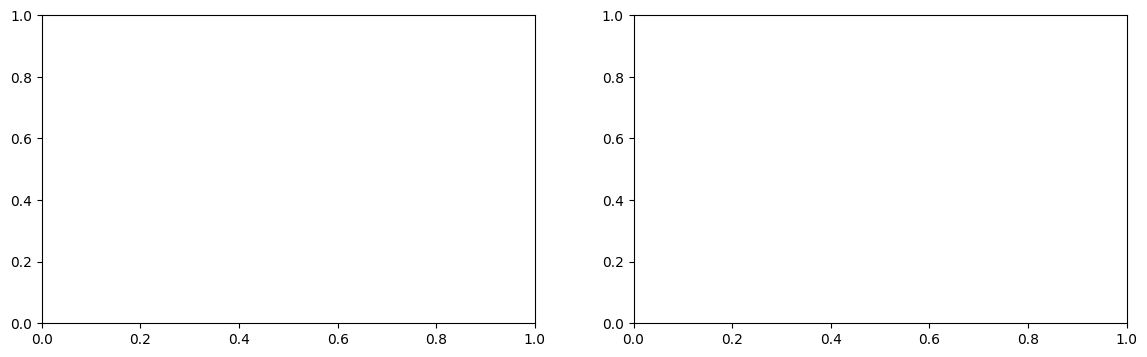

In [84]:
num_seeds = 10 
temp = 'dula'
hops_revbal = f"figs/rbm_sample_hops_revbal/num_seeds_{num_seeds}/cyc_{temp}_burnin_adaptive_0.025_alg_big_is_better_cycles_250"
hops_revbal_mean = np.load(f"{hops_revbal}_log_mmds_mean.npy")
hops_revbal_std = np.load(f"{hops_revbal}_log_mmds_var.npy") ** .5

optim = f"figs/rbm_sample_adapt_optim/num_seeds_{num_seeds}/cyc_{temp}_burnin_adaptive_0.025_alg_big_is_better_optim_cycles_250"
optim_mean = np.load(f"{optim}_log_mmds_mean.npy")
optim_std = np.load(f"{optim}_log_mmds_var.npy") ** .5

fig, ax = plt.subplots(1, 2, figsize=(14, 4))


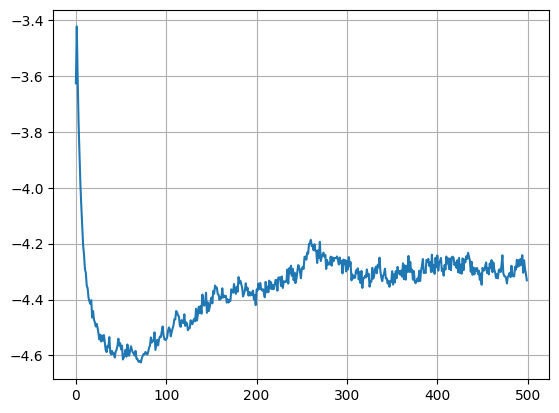

In [85]:
plt.plot(optim_mean)
plt.grid()